In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pd.read_csv('ml-curated-data.csv')

,lag_11,lag_7,lag_6,lag_3,lag_2,lag_1,state,gender,age,wage_increase
0,0.024181,-0.053836,-0.023294,-0.087671,0.059876,0.032627,0.015672,0.019090,0.016816,0.075232
1,0.001615,-0.023294,-0.063004,0.059876,0.032627,0.075232,0.015672,0.019090,0.016816,-0.021322
2,0.002881,-0.063004,0.131306,0.032627,0.075232,-0.021322,0.015672,0.019090,0.016816,-0.023162
3,0.093041,0.131306,-0.087671,0.075232,-0.021322,-0.023162,0.015672,0.019090,0.016816,-0.028393
4,-0.053836,-0.087671,0.059876,-0.021322,-0.023162,-0.028393,0.015672,0.019090,0.016816,0.028896
5,-0.023294,0.059876,0.032627,-0.023162,-0.028393,0.028896,0.015672,0.019090,0.016816,0.029645
6,-0.063004,0.032627,0.075232,-0.028393,0.028896,0.029645,0.015672,0.019090,0.016816,0.058821
7,0.131306,0.075232,-0.021322,0.028896,0.029645,0.058821,0.015672,0.019090,0.016816,0.024489
8,-0.087671,-0.021322,-0.023162,0.029645,0.058821,0.024489,0.015672,0.019090,0.016816,0.051312
9,0.059876,-0.023162,-0.028393,0.058821,0.024489,0.051312,0.015672,0.019090,0.016816,-0.065009


In [4]:
DATOS=datos=pd.read_csv('ml-curated-data.csv')

In [5]:
datos.head()

,lag_11,lag_7,lag_6,lag_3,lag_2,lag_1,state,gender,age,wage_increase
0,0.024181,-0.053836,-0.023294,-0.087671,0.059876,0.032627,0.015672,0.01909,0.016816,0.075232
1,0.001615,-0.023294,-0.063004,0.059876,0.032627,0.075232,0.015672,0.01909,0.016816,-0.021322
2,0.002881,-0.063004,0.131306,0.032627,0.075232,-0.021322,0.015672,0.01909,0.016816,-0.023162
3,0.093041,0.131306,-0.087671,0.075232,-0.021322,-0.023162,0.015672,0.01909,0.016816,-0.028393
4,-0.053836,-0.087671,0.059876,-0.021322,-0.023162,-0.028393,0.015672,0.01909,0.016816,0.028896


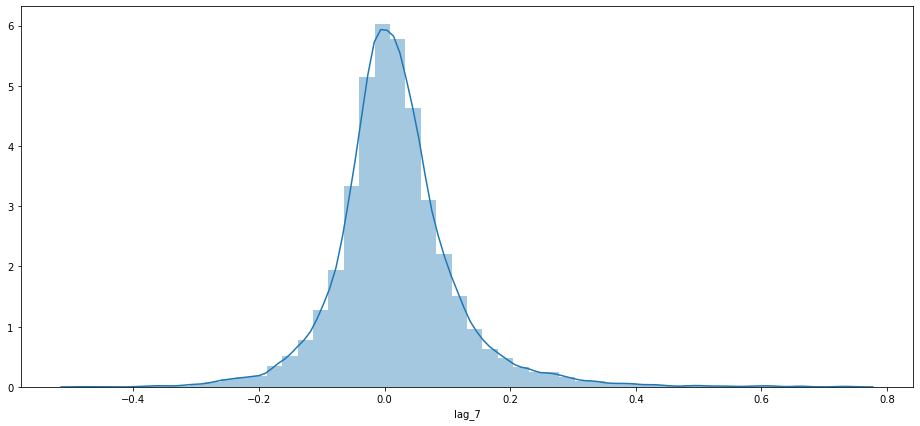

In [6]:
fig, ax=plt.subplots(figsize=(16,7))
sns.distplot(datos.iloc[:,1])


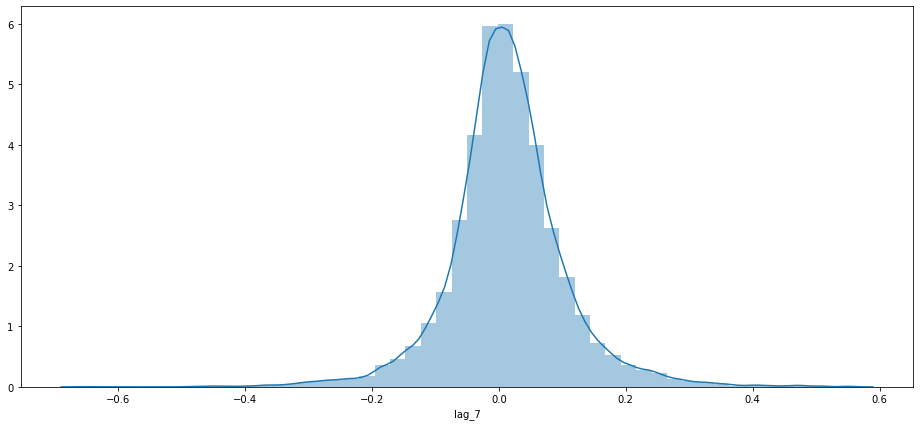

In [7]:
fig, ax=plt.subplots(figsize=(16,7))
sns.distplot(np.log1p(datos.iloc[:,1]))

In [8]:
X=datos.iloc[:,:-1]
Y=datos.iloc[:,-1]

In [9]:
X.head()

,lag_11,lag_7,lag_6,lag_3,lag_2,lag_1,state,gender,age
0,0.024181,-0.053836,-0.023294,-0.087671,0.059876,0.032627,0.015672,0.01909,0.016816
1,0.001615,-0.023294,-0.063004,0.059876,0.032627,0.075232,0.015672,0.01909,0.016816
2,0.002881,-0.063004,0.131306,0.032627,0.075232,-0.021322,0.015672,0.01909,0.016816
3,0.093041,0.131306,-0.087671,0.075232,-0.021322,-0.023162,0.015672,0.01909,0.016816
4,-0.053836,-0.087671,0.059876,-0.021322,-0.023162,-0.028393,0.015672,0.01909,0.016816


In [10]:
X=datos.iloc[:,:-1]

In [11]:
X

,lag_11,lag_7,lag_6,lag_3,lag_2,lag_1,state,gender,age
0,0.024181,-0.053836,-0.023294,-0.087671,0.059876,0.032627,0.015672,0.019090,0.016816
1,0.001615,-0.023294,-0.063004,0.059876,0.032627,0.075232,0.015672,0.019090,0.016816
2,0.002881,-0.063004,0.131306,0.032627,0.075232,-0.021322,0.015672,0.019090,0.016816
3,0.093041,0.131306,-0.087671,0.075232,-0.021322,-0.023162,0.015672,0.019090,0.016816
4,-0.053836,-0.087671,0.059876,-0.021322,-0.023162,-0.028393,0.015672,0.019090,0.016816
5,-0.023294,0.059876,0.032627,-0.023162,-0.028393,0.028896,0.015672,0.019090,0.016816
6,-0.063004,0.032627,0.075232,-0.028393,0.028896,0.029645,0.015672,0.019090,0.016816
7,0.131306,0.075232,-0.021322,0.028896,0.029645,0.058821,0.015672,0.019090,0.016816
8,-0.087671,-0.021322,-0.023162,0.029645,0.058821,0.024489,0.015672,0.019090,0.016816
9,0.059876,-0.023162,-0.028393,0.058821,0.024489,0.051312,0.015672,0.019090,0.016816


In [12]:
Xnorm=np.log1p(datos.iloc[:,:-1])

In [13]:
Xnorm.head()

,lag_11,lag_7,lag_6,lag_3,lag_2,lag_1,state,gender,age
0,0.023893,-0.055339,-0.023569,-0.091754,0.058152,0.032106,0.015551,0.01891,0.016676
1,0.001614,-0.023569,-0.065077,0.058152,0.032106,0.072536,0.015551,0.01891,0.016676
2,0.002877,-0.065077,0.123372,0.032106,0.072536,-0.021553,0.015551,0.01891,0.016676
3,0.088964,0.123372,-0.091754,0.072536,-0.021553,-0.023434,0.015551,0.01891,0.016676
4,-0.055339,-0.091754,0.058152,-0.021553,-0.023434,-0.028804,0.015551,0.01891,0.016676


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
Xtrain, Xtest, Ytrain, Ytest =train_test_split(X,Y, test_size=.3)

In [16]:
Xtrain.head()

,lag_11,lag_7,lag_6,lag_3,lag_2,lag_1,state,gender,age
1416,0.048685,-0.046857,-0.043343,0.162941,0.002366,-0.077487,0.014591,0.019090,0.016816
2530,-0.024042,-0.007842,0.076727,0.033818,0.150854,-0.096170,0.018613,0.019090,0.014807
10262,0.007483,-0.033813,0.063930,-0.049699,0.126564,0.029315,0.021115,0.017736,0.014807
4527,0.101176,-0.007544,0.036676,0.075382,0.036984,0.097608,0.016767,0.019090,0.015862
2361,-0.005413,0.014411,-0.007591,0.006575,0.010681,0.031138,0.015738,0.019090,0.014807


In [17]:
Ytrain = Ytrain.to_frame()

In [18]:
Ytrain

,wage_increase
1416,0.070727
2530,-0.011596
10262,-0.008100
4527,-0.069052
2361,-0.037295
6590,0.029563
6645,-0.078618
6621,0.018451
1727,0.051139
700,0.218616


In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
import random


def get_random_params():
    return {
        "criterion": random.choice(["mse", "friedman_mse", "mae"]),
        "splitter": random.choice(["best", "random"]),
        "max_depth": random.choice(list(range(1, 10)) + [None]),
        "max_features": random.choice((range(10, 100))) / 100
    }

param = get_random_params()
param

{'criterion': 'mae', 'splitter': 'random', 'max_depth': 9, 'max_features': 0.7}

In [21]:
def get_rsme(df, param, target_col, features):
    train = df.sample(frac=0.7)
    test = df.drop(train.index)
    train_x = train.drop(target_col, 1)
    train_y = train.drop(features, 1)
    test_x = test.drop(target_col, 1)
    test_y = test.drop(features, 1)
    model=DecisionTreeRegressor(**param) 
    model.fit(train_x, train_y)
    estimates = model.predict(train_x)
    error = np.asmatrix(train_y.values - estimates)
    sme = (error.T * error / len(error)).tolist()[0][0]
    return np.sqrt(sme)

In [22]:
get_rsme(datos, param, target_col="wage_increase", features=[c for c in datos.columns if c != "wage_increase"])

0.09945882305473114

In [26]:
# Iniciar 1000 iteraciones
result = []
for i in range(1000):
    param = get_random_params()
    rsme = get_rsme(datos, param, target_col="wage_increase", features=[c for c in datos.columns if c != "wage_increase"])
    param["rsme"] = rsme
    result.append(param)


In [27]:
print (result)

[{'criterion': 'mse', 'splitter': 'best', 'max_depth': 6, 'max_features': 0.76, 'rsme': 0.09780058694432679}, {'criterion': 'friedman_mse', 'splitter': 'random', 'max_depth': 8, 'max_features': 0.65, 'rsme': 0.0960127494914306}, {'criterion': 'friedman_mse', 'splitter': 'random', 'max_depth': 3, 'max_features': 0.32, 'rsme': 0.09578719936549292}, {'criterion': 'friedman_mse', 'splitter': 'best', 'max_depth': 3, 'max_features': 0.59, 'rsme': 0.0966913092208127}, {'criterion': 'mae', 'splitter': 'random', 'max_depth': None, 'max_features': 0.84, 'rsme': 0.10412211047778672}, {'criterion': 'mae', 'splitter': 'best', 'max_depth': None, 'max_features': 0.2, 'rsme': 0.09803355695100784}, {'criterion': 'mae', 'splitter': 'random', 'max_depth': 2, 'max_features': 0.54, 'rsme': 0.09743794673020383}, {'criterion': 'mse', 'splitter': 'best', 'max_depth': None, 'max_features': 0.9, 'rsme': 0.11395129972613068}, {'criterion': 'friedman_mse', 'splitter': 'random', 'max_depth': 3, 'max_features': 0.7

In [33]:
result_df=pd.DataFrame(result)
print (result_df)

        criterion splitter  max_depth  max_features      rsme
0             mse     best        6.0          0.76  0.097801
1    friedman_mse   random        8.0          0.65  0.096013
2    friedman_mse   random        3.0          0.32  0.095787
3    friedman_mse     best        3.0          0.59  0.096691
4             mae   random        NaN          0.84  0.104122
..            ...      ...        ...           ...       ...
995           mse     best        5.0          0.57  0.098990
996           mse   random        9.0          0.16  0.097271
997           mse   random        6.0          0.31  0.095614
998           mse   random        8.0          0.42  0.100534
999           mae     best        2.0          0.23  0.097654

[1000 rows x 5 columns]


In [42]:
result_df.to_csv('1000.csv')

NameError: name 'result_df' is not defined

In [23]:
iteraciones=pd.read_csv('1000.csv')
iteraciones

,Unnamed: 0,criterion,splitter,max_depth,max_features,rsme
0,0,mse,best,6.0,0.76,0.097801
1,1,friedman_mse,random,8.0,0.65,0.096013
2,2,friedman_mse,random,3.0,0.32,0.095787
3,3,friedman_mse,best,3.0,0.59,0.096691
4,4,mae,random,NaN,0.84,0.104122
5,5,mae,best,NaN,0.20,0.098034
6,6,mae,random,2.0,0.54,0.097438
7,7,mse,best,NaN,0.90,0.113951
8,8,friedman_mse,random,3.0,0.76,0.094959
9,9,friedman_mse,random,6.0,0.83,0.098888


In [24]:
rsmes=iteraciones['rsme']
rsmes

0      0.097801
1      0.096013
2      0.095787
3      0.096691
4      0.104122
5      0.098034
6      0.097438
7      0.113951
8      0.094959
9      0.098888
10     0.096878
11     0.106005
12     0.099072
13     0.097056
14     0.094485
15     0.095055
16     0.097087
17     0.102363
18     0.096167
19     0.096852
20     0.098890
21     0.098584
22     0.102566
23     0.096504
24     0.098460
25     0.095606
26     0.097212
27     0.097402
28     0.101886
29     0.096429
         ...   
970    0.095930
971    0.096700
972    0.096716
973    0.096319
974    0.099141
975    0.098443
976    0.096399
977    0.096095
978    0.100882
979    0.095240
980    0.096722
981    0.111332
982    0.097570
983    0.096837
984    0.127393
985    0.100047
986    0.097365
987    0.104652
988    0.118251
989    0.095059
990    0.096257
991    0.096871
992    0.096253
993    0.096869
994    0.096442
995    0.098990
996    0.097271
997    0.095614
998    0.100534
999    0.097654
Name: rsme, Length: 1000

In [25]:
m=min(i for i in rsmes)
m

0.09358296559364168

In [26]:
mp=iteraciones[iteraciones.rsme == m]
mp

,Unnamed: 0,criterion,splitter,max_depth,max_features,rsme
847,847,mae,best,2.0,0.24,0.093583


In [27]:
Tree=DecisionTreeRegressor(criterion='mae', splitter='best', max_depth=2, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=.24, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort=False)

In [28]:
model = DecisionTreeRegressor(criterion='mae', max_depth=2.00, max_features=0.24,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')


In [30]:
model.fit(Xtest, Ytest)

DecisionTreeRegressor(criterion='mae', max_depth=2.0, max_features=0.24,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [31]:
estimates = model.predict(Xtest)
estimates

array([0.00501666, 0.00501666, 0.00501666, ..., 0.01923532, 0.01923532,
       0.00501666])

In [32]:
Ypredict=model.predict(Xtest)

In [51]:
Comp=pd.DataFrame({'Real': Ytest, 'Predict': Ypredict})
Comp

,Real,Predict
9532,0.060672,0.005017
6959,0.033882,0.005017
3569,-0.054775,0.005017
3906,-0.036698,0.005017
9633,0.056222,0.019235
7921,0.005871,0.005017
7150,0.039369,0.005017
7607,-0.034868,0.019235
8572,0.152292,0.019235
1611,0.048267,0.005017


In [34]:
estimates = model.predict(Xtest)
error = np.asmatrix(Ytest.values - estimates)
sme = (error.T * error / len(error)).tolist()[0][0]
sme

0.003097466768791924

In [35]:
np.sqrt(sme)

0.055654889891113106

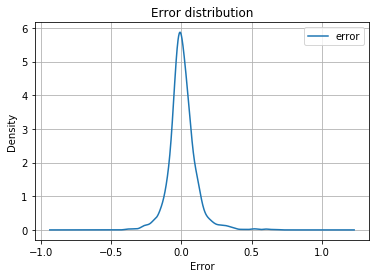

,error
count,338000.000000
mean,0.785849
std,9.776110
min,-39.573016
25%,-4.125420
50%,0.000000
75%,5.057864
max,68.902237


In [36]:
df_errors = pd.DataFrame({'error': [e for ls in error.tolist() for e in ls]})
df_errors.plot.kde()
plt.title("Error distribution")
plt.xlabel("Error")
plt.grid()
plt.show()

100 * df_errors.describe()

In [37]:
test_results = pd.DataFrame(
    {
    "y": Ytest,
    "y_estimate": Ypredict
    }
)

100 * test_results.describe()

,y,y_estimate
count,338000.000000,338000.000000
mean,1.834215,1.048366
std,9.903699,1.408911
min,-38.087685,-2.164947
25%,-3.143507,0.501666
50%,1.038663,0.501666
75%,6.151501,1.923532
max,67.095144,7.415433


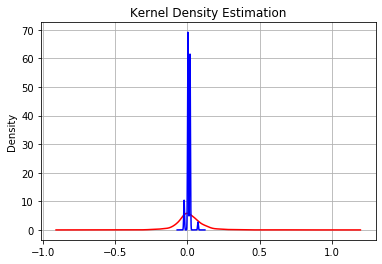

In [38]:
test_results.y.plot.kde(c='r')
test_results.y_estimate.plot.kde(c='b')
plt.title("Kernel Density Estimation")
plt.grid()
plt.show()

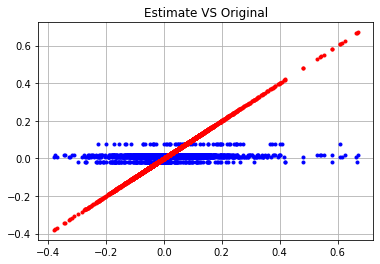

In [39]:

plt.plot(test_results.y, test_results.y_estimate, '.b')
plt.plot(test_results.y, test_results.y, '.r')
plt.title("Estimate VS Original")
plt.grid()
plt.show()

In [41]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [42]:
datos


,lag_11,lag_7,lag_6,lag_3,lag_2,lag_1,state,gender,age,wage_increase
0,0.024181,-0.053836,-0.023294,-0.087671,0.059876,0.032627,0.015672,0.019090,0.016816,0.075232
1,0.001615,-0.023294,-0.063004,0.059876,0.032627,0.075232,0.015672,0.019090,0.016816,-0.021322
2,0.002881,-0.063004,0.131306,0.032627,0.075232,-0.021322,0.015672,0.019090,0.016816,-0.023162
3,0.093041,0.131306,-0.087671,0.075232,-0.021322,-0.023162,0.015672,0.019090,0.016816,-0.028393
4,-0.053836,-0.087671,0.059876,-0.021322,-0.023162,-0.028393,0.015672,0.019090,0.016816,0.028896
5,-0.023294,0.059876,0.032627,-0.023162,-0.028393,0.028896,0.015672,0.019090,0.016816,0.029645
6,-0.063004,0.032627,0.075232,-0.028393,0.028896,0.029645,0.015672,0.019090,0.016816,0.058821
7,0.131306,0.075232,-0.021322,0.028896,0.029645,0.058821,0.015672,0.019090,0.016816,0.024489
8,-0.087671,-0.021322,-0.023162,0.029645,0.058821,0.024489,0.015672,0.019090,0.016816,0.051312
9,0.059876,-0.023162,-0.028393,0.058821,0.024489,0.051312,0.015672,0.019090,0.016816,-0.065009


In [43]:
from sklearn.tree import export_graphviz
from sklearn import graphviz

ImportError: cannot import name 'graphviz' from 'sklearn' (C:\Users\SYSTEG\Anaconda3\lib\site-packages\sklearn\__init__.py)

In [44]:
columns=datos.columns
columns=columns[0:9]
columns

Index(['lag_11', 'lag_7', 'lag_6', 'lag_3', 'lag_2', 'lag_1', 'state',
       'gender', 'age'],
      dtype='object')

In [45]:
arbol=export_graphviz(model,out_file='arbol.dot',
                class_names=datos.wage_increase,
                feature_names=columns,
                impurity=False,
                filled=True)


In [46]:
with open ('arbol.dot') as f:
    dot_graph=f.read
    tree.export_graphviz
    


In [47]:
from IPython.display import Image  
 

In [48]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

NameError: name 'pydot' is not defined

In [49]:
from sklearn.tree import convert_to_graphviz


ImportError: cannot import name 'convert_to_graphviz' from 'sklearn.tree' (C:\Users\SYSTEG\Anaconda3\lib\site-packages\sklearn\tree\__init__.py)

In [ ]:
tree.export_graphviz(model)
# Convertir el archivo .dot a png para poder visualizarlo
check_call(model)
PImage(model)